In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.simplefilter(action='ignore', category=Warning)
pd.set_option('display.max_columns', None)

sns.set_palette(palette='icefire')

In [ ]:
# read the csv file downloaded from kaggle
df =pd.read_csv('diabetic_kaggle_data.csv')
df.head()

In [5]:
# function to acquire the data
def get_diabetic_data():
    df= pd.read_csv('diabetic_kaggle_data.csv')
    return df



In [ ]:
# function to acquire ID mapping
def get_id_data():
    df2= pd.read_csv('IDs_mapping.csv')
    return df2

In [ ]:
df.info()

In [ ]:
# checking for nulls in dataframe
df.isnull().sum()


## make a dataframe that has unique values for each column

In [ ]:
# create dataframe which contains unique values of all columns and it's count
def uniqueValueDataFrame(df):
    col_name = []
    unique_value_list = []
    total_unique_value = []
    data_type = []
    for col in df.columns:
        col_name.append(col)
        unique_value_list.append(df[col].unique())
        total_unique_value.append(len(df[col].unique()))
        data_type.append(df[col].dtype)
    
    data = pd.DataFrame({"col":col_name, "unique values":unique_value_list, "unique count":total_unique_value, "data type":data_type})
    
    data = data.set_index("col")
    return data.sort_values("unique count",ascending=False)






In [ ]:
unique_data = uniqueValueDataFrame(df)
unique_data


### observation made from unique values dataframe
- citoglipton, examide are Categorical columns with just one category 'No' so we will drop these columuns as they wont be adding any value to the prediction.
- encounter_id and patient_nbr are just ID's of the record and patient respectively so we will drop those as well.
- gender has 3 category which needs to be fixed.
- Target variable 9 Readmitted has 3 values which need to be converted into 0 and 1.

- **In the dataset missing values are represented as '?' sign and not as 'NaN' beacause of which it says that we dont have any missing values**


In [ ]:
# replace ? with np.nan
df.replace('?', np.nan , inplace=True)

In [ ]:
msno.bar(df,sort='descending',color='#66a9bc')
plt.show()

In [ ]:
# drop the unwanted columns
drop_na_list = ['examide' ,'citoglipton','weight','encounter_id','patient_nbr','payer_code','medical_specialty']  
df.drop(columns=drop_na_list, axis=1, inplace=True)

In [ ]:
kaggle['max_glu_serum'] = kaggle['max_glu_serum'].replace(['None', 'Norm', '>300', '>200'],[0,0,1,1]).astype(int)

In [ ]:
df.isnull().sum()

## Target variable: 
 - we are checking if the patient was readmitted within 30 days we will update values with >30 as 0 as the patient was not admitted before 30 days



In [ ]:
df.readmitted.value_counts()

In [ ]:
#replacing the column with 1 and O
df.readmitted = [1 if each=='<30' else 0 for each in df.readmitted]

In [ ]:
sns.countplot(data=df, x='readmitted')

# Age Vs Readmission

In [ ]:
plt.figure(figsize=(20,5),dpi=100)
sns.countplot(df['age'], hue=df.readmitted)

In [ ]:
plt.figure(figsize=(20,5),dpi=100)
age_prob = sns.catplot(x = "age", y = "readmitted", data = df, kind = "bar", height=5, aspect=30/8,palette=['#2492b6'])
age_prob.set_ylabels("Readmitted Probability")
age_prob.set_xlabels("Age Group")
plt.tight_layout()

# Race Vs Readmission

In [ ]:
print(f'total nulls in race column{df.race.isnull().sum()}')
df.race.replace(np.nan,'Other',inplace=True)


In [ ]:
df.race.value_counts()

In [ ]:
plt.figure(figsize=(20,5),dpi=100)
sns.countplot(df['race'], hue=df.readmitted)

# Gender vs readmission

In [ ]:
# checking the gender columns
df.gender.value_counts()

In [ ]:
# replaceing the invalid gender to np.nan and dropped it
df.gender.replace('Unknown/Invalid', np.nan , inplace=True)
df.dropna(subset=['gender'], how='all', inplace = True)

In [ ]:
df.gender.isnull().sum()

In [ ]:
sns.countplot(x='gender',data= df)

In [ ]:
plt.figure(figsize=(20,5),dpi=100)
sns.countplot(df['gender'], hue=df.readmitted)

## Dealing With max_gluserum

- If the glucose level is below 100 it is normal and if it goes beyond 300 that indicates diabetes and values above 100 may also indicate pre-diabetes, level depends what you ate before the test

In [ ]:
sns.catplot(x = 'max_glu_serum', y = "readmitted", data = df, kind = "bar", height=5, aspect=30/8,palette=['#2492b6'])


In [ ]:
time_in_hospital = sns.catplot(x = 'time_in_hospital', y = "readmitted", data = df, kind = "bar", height=5, aspect=30/8,palette=['#2492b6'])
time_in_hospital.set_ylabels("Readmission Probability")
time_in_hospital.set_xlabels("Time In Hospital (days)")
plt.tight_layout()
#plt.savefig('images/time_in_hospital.jpg')

In [ ]:
num_medications = sns.catplot(x = 'num_medications', y = "readmitted", data = df, kind = "bar", height=5, aspect=30/8,palette=['#2492b6'])
num_medications.set_ylabels("Readmission Probability")
num_medications.set_xlabels("Number Of Medications")
plt.tight_layout()


In [ ]:
df.shape

In [ ]:
df= df.drop(columns=['admission_type_id', 'diag_1','diag_2', 'diag_3', 'admission_source_id', 'discharge_disposition_id',
'change', 'num_lab_procedures', 'num_procedures', 'number_emergency','number_outpatient','number_inpatient','number_diagnoses'])

In [ ]:
uniqueValueDataFrame(df)

In [ ]:
dummy_df = pd.get_dummies(df[['race', 'gender','age','metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide',  'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone','diabetesMed',
       'metformin-pioglitazone']])

In [ ]:
df = pd.concat([df, dummy_df], axis=1)
df.head()

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head()

In [ ]:
df.insulin.dtypes

In [ ]:
df3= df.drop(columns=['A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide',
'tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone',
'metformin-pioglitazone','diabetesMed'])

In [ ]:
df3.head()

In [ ]:
df3.shape

In [ ]:
df3= df3.drop(columns=['repaglinide_No', 'nateglinide_No', 'chlorpropamide_No','glimepiride_No', 'acetohexamide_No','glipizide_No','glyburide_No','tolbutamide_No', 'pioglitazone_No', 'rosiglitazone_No','acarbose_No','miglitol_No', 'troglitazone_No', 'tolazamide_No', 'insulin_No','glyburide-metformin_No','glipizide-metformin_No', 'glimepiride-pioglitazone_No','metformin-rosiglitazone_No', 'metformin-pioglitazone_No','diabetesMed_No'])


In [ ]:
df3.head()

In [ ]:
df3.shape

In [135]:
def clean_diabetic(df):
    # replace ? with np.nan
    df.replace('?', np.nan , inplace=True)
    # drop the unwanted columns
    drop_na_list = ['examide' ,'citoglipton','weight','encounter_id','patient_nbr','payer_code','medical_specialty']  
    df.drop(columns=drop_na_list, axis=1, inplace=True)
    #replacing the column with 1 and O
    df.readmitted = [1 if each=='<30' else 0 for each in df.readmitted]
    df.race.replace(np.nan,'Other',inplace=True)
    df.gender.replace('Unknown/Invalid', np.nan , inplace=True)
    df.dropna(subset=['gender'], how='all', inplace = True)
    df= df.drop(columns=['admission_type_id', 'diag_1','diag_2', 'diag_3', 'admission_source_id', 'discharge_disposition_id',
    'change', 'num_lab_procedures', 'num_procedures', 'number_emergency','number_outpatient','number_diagnoses'])
    df['max_glu_serum'].replace(['None', 'Norm', '>300', '>200'],[-99,0,1,1]).astype(int)
    dummy_df = pd.get_dummies(df[['race', 'gender','age','metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide',  'insulin','max_glu_serum',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone','diabetesMed',
       'metformin-pioglitazone']])
    df = pd.concat([df, dummy_df], axis=1)
    df= df.drop(columns=['A1Cresult','metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide',
    'tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone', 'metformin-rosiglitazone',
    'metformin-pioglitazone','diabetesMed','max_glu_serum'])
    df= df.drop(columns=['repaglinide_No', 'nateglinide_No', 'chlorpropamide_No','glimepiride_No', 'acetohexamide_No','glipizide_No','glyburide_No','tolbutamide_No', 'pioglitazone_No', 'rosiglitazone_No','acarbose_No','miglitol_No', 'troglitazone_No', 'tolazamide_No', 'insulin_No','glyburide-metformin_No','glipizide-metformin_No', 'glimepiride-pioglitazone_No','metformin-rosiglitazone_No', 'metformin-pioglitazone_No','diabetesMed_No'])
    return df

    
    

In [136]:
kd= get_diabetic_data()

In [137]:
kd.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [138]:
kaggle= clean_diabetic(kd)
kaggle.head()

,race,gender,age,time_in_hospital,num_medications,number_inpatient,readmitted,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),metformin_Down,metformin_No,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_Steady,repaglinide_Up,nateglinide_Down,nateglinide_Steady,nateglinide_Up,chlorpropamide_Down,chlorpropamide_Steady,chlorpropamide_Up,glimepiride_Down,glimepiride_Steady,glimepiride_Up,acetohexamide_Steady,glipizide_Down,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_Steady,glyburide_Up,tolbutamide_Steady,pioglitazone_Down,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_Steady,rosiglitazone_Up,acarbose_Down,acarbose_Steady,acarbose_Up,miglitol_Down,miglitol_Steady,miglitol_Up,troglitazone_Steady,tolazamide_Steady,tolazamide_Up,insulin_Down,insulin_Steady,insulin_Up,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,glyburide-metformin_Down,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,diabetesMed_Yes,metformin-pioglitazone_Steady
0,Caucasian,Female,[0-10),1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,Caucasian,Female,[10-20),3,18,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,AfricanAmerican,Female,[20-30),2,13,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,Caucasian,Male,[30-40),2,16,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
4,Caucasian,Male,[40-50),1,8,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [3]:
pd.set_option('display.max_columns', None)


In [28]:
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

In [140]:
def data_split(df, stratify_by='readmitted'):
    '''
    this function takes in a dataframe and splits it into 3 samples, 
    a test, which is 20% of the entire dataframe, 
    a validate, which is 24% of the entire dataframe,
    and a train, which is 56% of the entire dataframe. 
    It then splits each of the 3 samples into a dataframe with independent variables
    and a series with the dependent, or target variable. 
    The function returns 3 dataframes and 3 series:
    X_train (df) & y_train (series), X_validate & y_validate, X_test & y_test. 
    '''
    
    # split df into test (20%) and train_validate (80%)
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)

    # split train_validate off into train (70% of 80% = 56%) and validate (30% of 80% = 24%)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
    
    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns=['readmitted','race', 'gender', 'age','number_inpatient','num_medications'])
    y_train = train['readmitted']
    
    # split validate into X (dataframe, drop target) & y (series, keep target only)
    X_validate = validate.drop(columns=['readmitted','race', 'gender', 'age','number_inpatient','num_medications'])
    y_validate = validate['readmitted']
    
    # split test into X (dataframe, drop target) & y (series, keep target only)
    X_test = test.drop(columns=['readmitted','race', 'gender', 'age','number_inpatient','num_medications'])
    y_test = test['readmitted']
    
    return train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test


In [99]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test= data_split(kaggle)



In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve


In [44]:
log_baseline = LogisticRegression(solver='liblinear', class_weight='balanced')

In [45]:
train.readmitted.value_counts()

0    50632
1     6355
Name: readmitted, dtype: int64

In [102]:
train['baseline'] = 0

In [103]:
baseline_accuracy=(train.readmitted == train.baseline).mean()
print(f'The baselline Accuracy for Train data ={baseline_accuracy:.2%}')

The baselline Accuracy for Train data =88.85%


# Fit the Train Data into 3 different models

- I will be using following three diffrent models to compare
#### Decision Tree
#### Random Forest
#### Logistic Regression



In [125]:
# Make the model named as tree1 and tree 2
tree1 = DecisionTreeClassifier(max_depth=5, random_state=123)

In [126]:
# Fit the model (on train and only train)
tree1 = tree1.fit(X_train, y_train)



In [127]:
# Use the model and  evaluate the model's performance on train, first
y_predictions = tree1.predict(X_train)

# Model to predict performance on validation set
y_predictions1= tree1.predict(X_validate)

In [128]:
print('Classification Report for Train Data:')
# print the classification report in the form of dataframe.
reportDT=classification_report(y_train, y_predictions, output_dict=True)
pd.DataFrame(reportDT).T

Classification Report for Train Data:


,precision,recall,f1-score,support
0,0.888499,1.000000,0.940958,50632.000000
1,1.000000,0.000157,0.000315,6355.000000
accuracy,0.888501,0.888501,0.888501,0.888501
macro avg,0.944249,0.500079,0.470636,56987.000000
weighted avg,0.900933,0.888501,0.836060,56987.000000


In [129]:
print('Classification report for Validate Data set:')
# print the classification report in the form of dataframe.
report=classification_report(y_validate, y_predictions1, output_dict=True)
pd.DataFrame(report).T

Classification report for Validate Data set:


,precision,recall,f1-score,support
0,0.886214,1.000000,0.939675,21644.000000
1,0.000000,0.000000,0.000000,2779.000000
accuracy,0.886214,0.886214,0.886214,0.886214
macro avg,0.443107,0.500000,0.469837,24423.000000
weighted avg,0.785375,0.886214,0.832753,24423.000000


# Examining data with Random Forrest

In [130]:
# make the model 'forest1' by using random forrest
forest = RandomForestClassifier(max_depth=5, random_state=123)

#fit the model on train data and validate data
forest1=forest.fit(X_train,y_train)


# Use the model to predict
y_predictions = forest1.predict(X_train)
y_predictions2= forest1.predict(X_validate)

# print out classification report and accuracy
print('Classification report for Train data:')
reportRF= (classification_report(y_train,y_predictions,output_dict=True))
pd.DataFrame(reportRF).T

Classification report for Train data:


,precision,recall,f1-score,support
0,0.888483,1.000000,0.940949,50632.000000
1,0.000000,0.000000,0.000000,6355.000000
accuracy,0.888483,0.888483,0.888483,0.888483
macro avg,0.444242,0.500000,0.470475,56987.000000
weighted avg,0.789403,0.888483,0.836018,56987.000000


In [131]:
print('Classification report for Validate data')
report=(classification_report(y_validate, y_predictions2, output_dict= True))
pd.DataFrame(report).T

Classification report for Validate data


,precision,recall,f1-score,support
0,0.886214,1.000000,0.939675,21644.000000
1,0.000000,0.000000,0.000000,2779.000000
accuracy,0.886214,0.886214,0.886214,0.886214
macro avg,0.443107,0.500000,0.469837,24423.000000
weighted avg,0.785375,0.886214,0.832753,24423.000000


# Examining train data with Linear Regression

In [132]:
# make the model 'logit' by using logistic regresssion
logit = LogisticRegression(C=1,random_state=123)

#fit the model on train data and validate data
logit1=logit.fit(X_train,y_train)


# Use the model to predict
y_predictions = logit1.predict(X_train)
y_predictions3= logit1.predict(X_validate)

# print out classification report and accuracy
reportLR= (classification_report(y_train,y_predictions,output_dict=True))
pd.DataFrame(reportLR).T

,precision,recall,f1-score,support
0,0.888483,1.000000,0.940949,50632.000000
1,0.000000,0.000000,0.000000,6355.000000
accuracy,0.888483,0.888483,0.888483,0.888483
macro avg,0.444242,0.500000,0.470475,56987.000000
weighted avg,0.789403,0.888483,0.836018,56987.000000


In [133]:
report= (classification_report(y_validate,y_predictions3,output_dict=True))
pd.DataFrame(report).T

,precision,recall,f1-score,support
0,0.886214,1.000000,0.939675,21644.000000
1,0.000000,0.000000,0.000000,2779.000000
accuracy,0.886214,0.886214,0.886214,0.886214
macro avg,0.443107,0.500000,0.469837,24423.000000
weighted avg,0.785375,0.886214,0.832753,24423.000000


In [134]:
# Accuracy of the three different models:
print('Accuracy based on Decision Tree classifier on training set: {:.4f}'
      .format(tree1.score(X_train, y_train)))
print('Accuracy based on Decision Tree classifier on validate set: {:.4f}'
      .format(tree1.score(X_validate, y_validate)))
print('----------------------')
print('Accuracy based on Random Forest classifier on training set: {:.4f}'
      .format(forest1.score(X_train, y_train)))
print('Accuracy based on Random Forest classifier on validate set: {:.4f}'
      .format(forest1.score(X_validate, y_validate)))
print('----------------------')
print('Accuracy based on Logistic Regression classifier on training set: {:.4f}'
      .format(logit1.score(X_train, y_train)))
print('Accuracy based on Logistic Regression classifier on validate set: {:.4f}'
      .format(logit1.score(X_validate, y_validate)))

Accuracy based on Decision Tree classifier on training set: 0.8885
Accuracy based on Decision Tree classifier on validate set: 0.8862
----------------------
Accuracy based on Random Forest classifier on training set: 0.8885
Accuracy based on Random Forest classifier on validate set: 0.8862
----------------------
Accuracy based on Logistic Regression classifier on training set: 0.8885
Accuracy based on Logistic Regression classifier on validate set: 0.8862


Text(0.5, 1.0, 'Top Features derived by Random Forest')

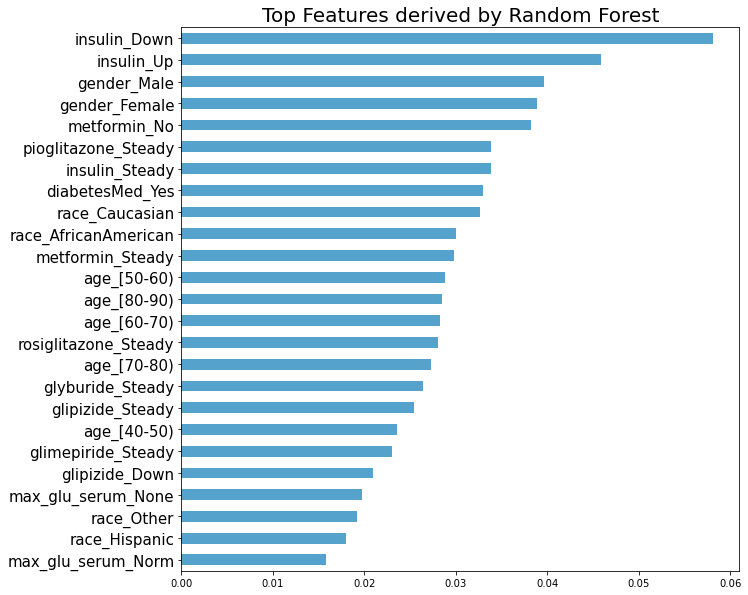

In [114]:
# After comparing three different models I found random forest perform slightly better but did not outperformed the baseline model

## to look for top features using random forest

rf=RandomForestClassifier(max_depth=10, random_state=123)
model=rf.fit(X_train,y_train)

(pd.Series(model.feature_importances_, index=X_train.columns)
   .nlargest(25)  
   .plot(kind='barh', figsize=[10,10])
    .invert_yaxis())
plt.yticks(size=15)
plt.title('Top Features derived by Random Forest', size=20)

In [115]:
print(roc_auc_score(y_train, y_train_predicted[:,1]))

0.5737523431598008


In [116]:
def generate_auc_roc_curve(estimator, X, y):
    y_pred_proba = estimator.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y,  y_pred_proba)
    auc = roc_auc_score(y, y_pred_proba)
    plt.figure(figsize=(8,5), dpi=100)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc='lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()
    plt.show()

In [117]:
def generate_model_report(y_actual, y_predicted):
    accuracy = accuracy_score(y_actual, y_predicted)
    precision = precision_score(y_actual, y_predicted)
    recall = recall_score(y_actual, y_predicted)
    f1 = f1_score(y_actual, y_predicted)
    
    return accuracy, precision, recall, f1

In [118]:
def report_and_matrix(estimator, X_train, X_test, y_train, y_test):
    y_hat_train = estimator.predict(X_train)
    y_hat_test = estimator.predict(X_test)
    
    # confusion matrix plot
    fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5), dpi=100) 
    plt.suptitle('Patients Readmitted Within 30 Days')
    
    plot_confusion_matrix(estimator, X_train , y_train, ax=ax1, normalize='all')
    ax1.title.set_text('TRAINING')
    ax1.set_xlabel('Predicted'); ax1.set_ylabel('Actual');
    #ax1.xaxis.set_ticklabels(['Yes', 'No']); ax1.yaxis.set_ticklabels(['No', 'Yes']);
    
    plot_confusion_matrix(estimator, X_validate , y_validate, ax=ax2, normalize='all')
    ax2.title.set_text('VALIDATE')
    ax2.set_xlabel('Predicted'); ax2.set_ylabel('Actual');
    #ax2.xaxis.set_ticklabels(['Yes', 'No']); ax2.yaxis.set_ticklabels(['No', 'Yes']);
    
    
    accuracy_train, precision_train, recall_train, f1_train = generate_model_report(y_train, y_hat_train)
    accuracy_test, precision_test, recall_test, f1_test = generate_model_report(y_test, y_hat_test)
    data = {
        'TRAIN':[accuracy_train, precision_train, recall_train, f1_train],
        'VALIDATE':[accuracy_test, precision_test, recall_test, f1_test]
    }
    df = pd.DataFrame(data, index =['ACCURACY', 'PERCISION', 'RECALL', 'F1'])
    display(df)

,TRAIN,VALIDATE
ACCURACY,0.889641,0.885026
PERCISION,0.866667,0.191489
RECALL,0.012274,0.003239
F1,0.024205,0.006369


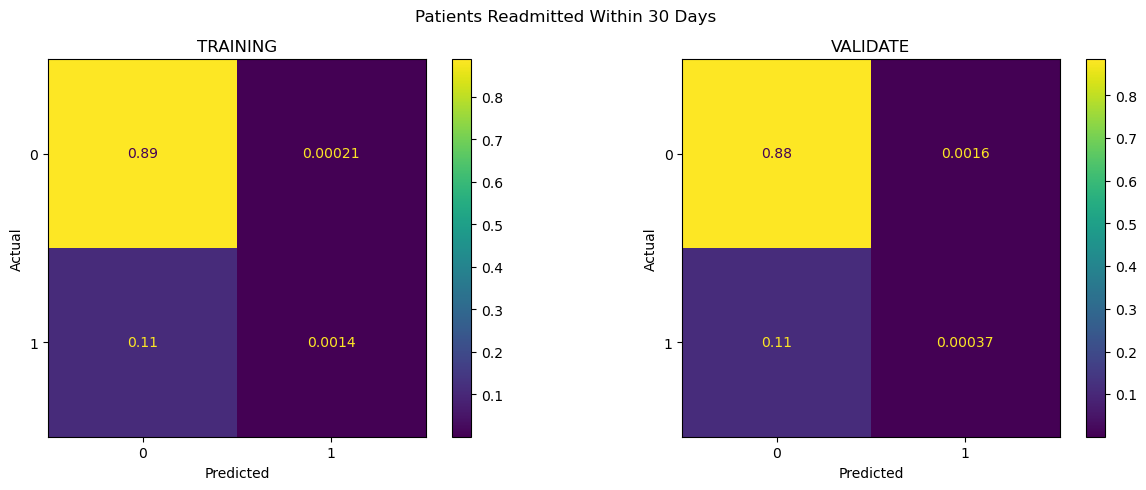

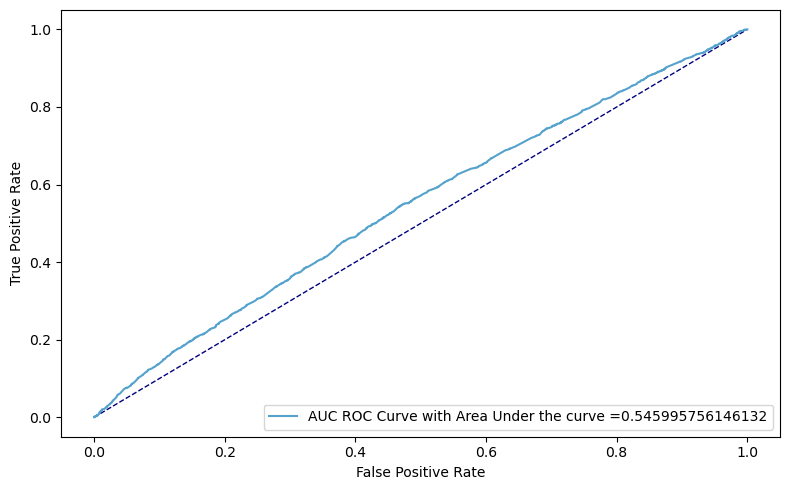

In [121]:
report_and_matrix(tree1, X_train, X_validate, y_train, y_validate)
generate_auc_roc_curve(logit,X_test, y_test)


,TRAIN,VALIDATE
ACCURACY,0.888483,0.886214
PERCISION,0.000000,0.000000
RECALL,0.000000,0.000000
F1,0.000000,0.000000


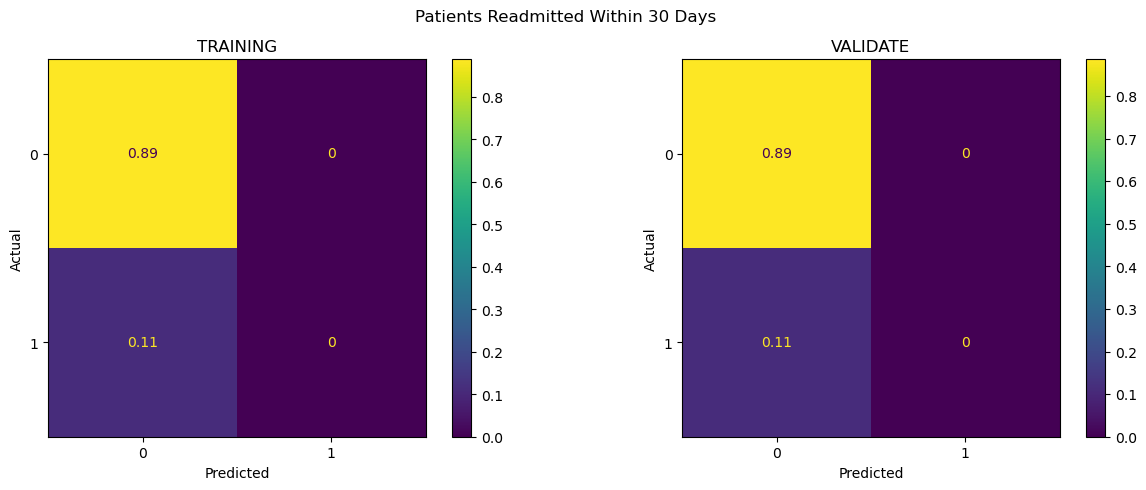

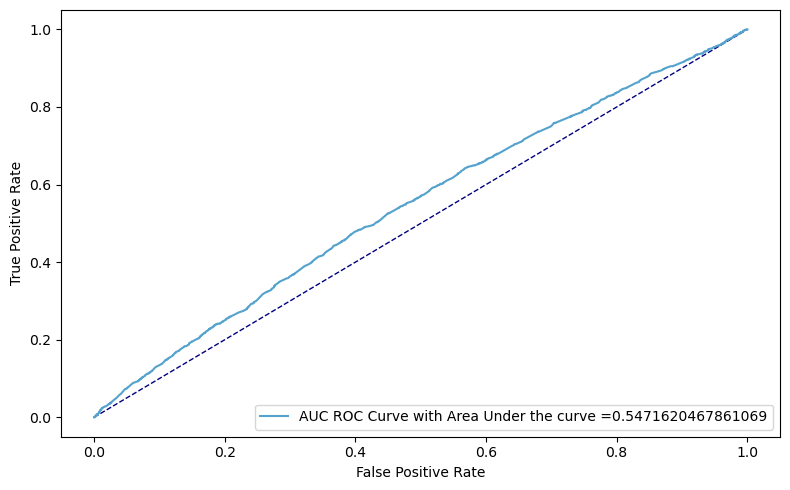

In [122]:
report_and_matrix(forest1, X_train, X_validate, y_train, y_validate)
generate_auc_roc_curve(forest1,X_test, y_test)

,TRAIN,VALIDATE
ACCURACY,0.888483,0.886214
PERCISION,0.000000,0.000000
RECALL,0.000000,0.000000
F1,0.000000,0.000000


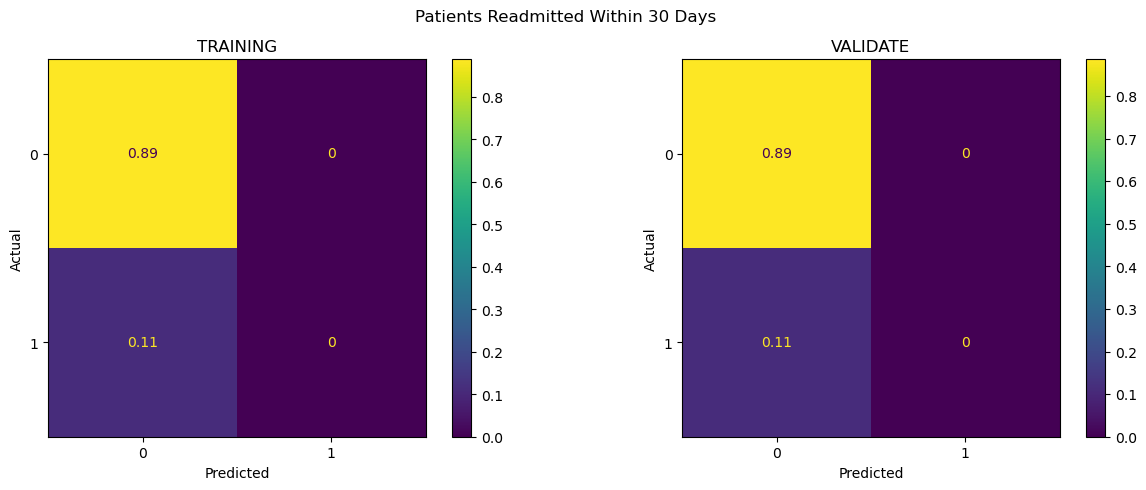

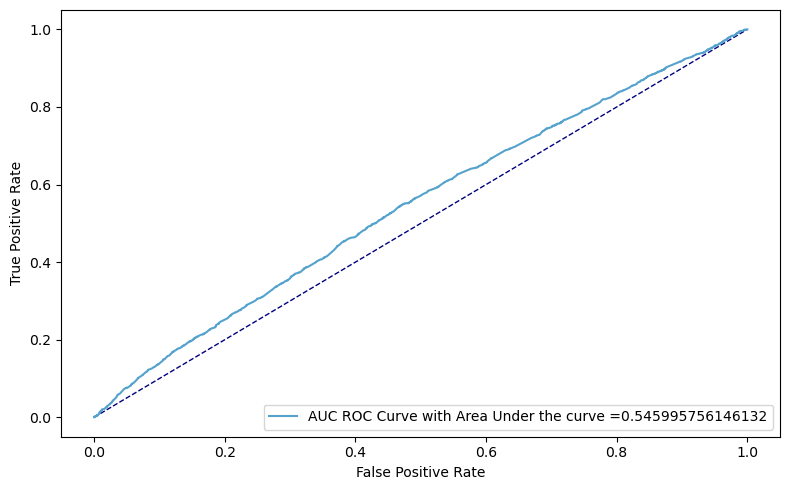

In [123]:
report_and_matrix(logit1, X_train, X_validate, y_train, y_validate)
generate_auc_roc_curve(logit1,X_test, y_test)



In [ ]:
# All the models created did not outperformed the baseline model.